### Data validation ###

Verify the data written by AWS glue into S3 is accessible and usable

Import libraries

In [1]:
import boto3
import seaborn as sns
import matplotlib.pyplot as plt
import awswrangler as wr
import pandas as pd
%matplotlib inline
sns.set(color_codes=True)

Set pandas option to display all columns and rows

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Initiate boto3 session and set the S3 path where the processed data is written into

In [3]:
session = boto3.session.Session(profile_name="default",
                                region_name="eu-central-1")
path="s3://some-bucket-xxxxx/pre-processed/twitter/CreatedDate=2021-05-14/"

AWSWrangler library to use to read parquet data from S3.
Verify the columns and data are matching with expected data.

In [4]:
df = wr.s3.read_parquet(path=path, dataset=True)
df.columns
df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,is_quote_status,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,retweeted_status,display_text_range,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,CreatedDate
0,Fri May 14 15:43:33 +0000 2021,1393230511829655553,1393230511829655553,@stayjinie @BTS_twt India I vote for BTS Dyna...,"<a href=""http://twitter.com/download/android"" ...",True,1392981942715535363,1392981942715535363,"{'int': None, 'long': 8.177424500474675e+17}",817742450047467520,stayjinie,"{'id': {'int': 593326395.0, 'long': None}, 'id...",False,{'full_text': '@stayjinie @BTS_twt India I vo...,0,0,0,0,"{'hashtags': [{'text': 'FaveChoreography', 'in...",False,False,low,en,1621007013648,None,"[20, 140]",False,None,<NA>,<NA>,None,None,2021-05-14
1,Fri May 14 15:43:34 +0000 2021,1393230513503043584,1393230513503043584,@iAT_19 @IDF india is sooo pathetic 😂,"<a href=""http://twitter.com/download/android"" ...",False,1393219983837065218,1393219983837065218,"{'int': None, 'long': 1.3615741692641034e+18}",1361574169264103426,iAT_19,"{'id': {'int': None, 'long': 1.238451989928763...",False,None,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1621007014047,None,"[13, 37]",<NA>,None,<NA>,<NA>,None,None,2021-05-14
2,Fri May 14 15:44:52 +0000 2021,1393230842210635777,1393230842210635777,RT @AnushkaSharma: Truly amazed and humbled by...,"<a href=""http://twitter.com/download/android"" ...",False,<NA>,<NA>,"{'int': None, 'long': None}",<NA>,<NA>,"{'id': {'int': None, 'long': 1.361324217317224...",False,None,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1621007092417,{'created_at': 'Fri May 14 05:00:28 +0000 2021...,None,<NA>,None,<NA>,<NA>,None,None,2021-05-14
3,Fri May 14 16:27:34 +0000 2021,1393241588114067456,1393241588114067456,RT @ShahNafisa: It was a beautiful little mark...,"<a href=""http://twitter.com/download/android"" ...",False,<NA>,<NA>,"{'int': None, 'long': None}",<NA>,<NA>,"{'id': {'int': 1115184546.0, 'long': None}, 'i...",True,None,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1621009654440,{'created_at': 'Fri May 14 15:54:56 +0000 2021...,None,<NA>,None,1393152658949689344,1393152658949689344,{'created_at': 'Fri May 14 10:34:12 +0000 2021...,"{'url': 'https://t.co/GkCQfZn83x', 'expanded':...",2021-05-14
4,Fri May 14 16:27:34 +0000 2021,1393241587606441986,1393241587606441986,RT @lakshmianand96: This was the same crowd th...,"<a href=""http://twitter.com/download/android"" ...",False,<NA>,<NA>,"{'int': None, 'long': None}",<NA>,<NA>,"{'id': {'int': None, 'long': 2933582581.0}, 'i...",True,None,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,1621009654319,{'created_at': 'Fri May 14 15:07:02 +0000 2021...,None,<NA>,None,1393165118553300998,1393165118553300998,{'created_at': 'Fri May 14 11:23:42 +0000 2021...,"{'url': 'https://t.co/UhI5RIOgDD', 'expanded':...",2021-05-14


Explore one of the most nested columns. 
Use pandas `json_normalize` function to explode the nested datastructure.
Verify the data

In [5]:
df_user = pd.json_normalize(df['user'])
df_user.head()

,id_str,name,screen_name,location,url,description,translator_type,protected,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,geo_enabled,contributors_enabled,is_translator,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,profile_image_url,profile_image_url_https,profile_banner_url,default_profile,default_profile_image,id.int,id.long
0,593326395,알레 ♡💛 🇨🇴,esa_mona25,"Medellín, Colombia",None,"🇨🇴 No soporto las Injusticias, Creo en el amor...",none,False,False,613,1953,3,42942,8143,Tue May 29 01:44:02 +0000 2012,False,False,False,EDECE9,http://abs.twimg.com/images/themes/theme3/bg.gif,https://abs.twimg.com/images/themes/theme3/bg.gif,True,088253,FFFFFF,E3E2DE,634047,True,http://pbs.twimg.com/profile_images/1386889318...,https://pbs.twimg.com/profile_images/138688931...,https://pbs.twimg.com/profile_banners/59332639...,False,False,5.933264e+08,NaN
1,1238451989928763392,amirah 🇵🇸🇲🇾,amirahusnaaaa_,None,None,🇲🇾,none,False,False,21,67,0,1301,339,Fri Mar 13 13:09:14 +0000 2020,False,False,False,F5F8FA,,,False,1DA1F2,C0DEED,DDEEF6,333333,True,http://pbs.twimg.com/profile_images/1392200515...,https://pbs.twimg.com/profile_images/139220051...,https://pbs.twimg.com/profile_banners/12384519...,True,False,NaN,1.238452e+18
2,1361324217317224453,Malav Bhavsar,MalavBhavsar13,None,None,None,none,False,False,10,186,0,10839,368,Mon Feb 15 14:39:36 +0000 2021,False,False,False,F5F8FA,,,False,1DA1F2,C0DEED,DDEEF6,333333,True,http://abs.twimg.com/sticky/default_profile_im...,https://abs.twimg.com/sticky/default_profile_i...,None,True,False,NaN,1.361324e+18
3,1115184546,Agha Sheraz Anokha,AghaSherazAli,Islamabad,None,Head/Incharge Social Media Pakistan Peoples Pa...,none,False,False,9456,1114,48,188728,89087,Wed Jan 23 20:08:46 +0000 2013,True,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,1DA1F2,C0DEED,DDEEF6,333333,True,http://pbs.twimg.com/profile_images/9850231170...,https://pbs.twimg.com/profile_images/985023117...,https://pbs.twimg.com/profile_banners/11151845...,True,False,1.115185e+09,NaN
4,2933582581,Parikshit Padharia,phpadharia,None,None,None,none,False,False,47,942,0,63549,10650,Wed Dec 17 13:32:26 +0000 2014,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,1DA1F2,C0DEED,DDEEF6,333333,True,http://pbs.twimg.com/profile_images/8930465638...,https://pbs.twimg.com/profile_images/893046563...,None,True,False,NaN,2.933583e+09


Plot a graph based on the top 5 total number of status count per user


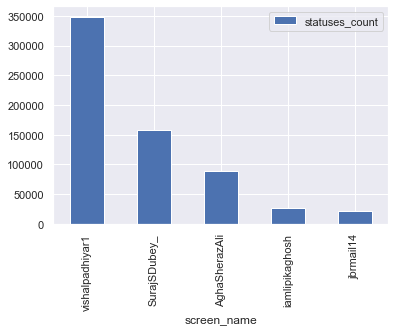

In [6]:
status_count = df_user.sort_values(['statuses_count', 'screen_name'], ascending=[False, True]).head(5)
status_count.plot(x="screen_name", y="statuses_count", kind="bar")
plt.show()

Plot graph for the most active users by location (by using value_counts function)

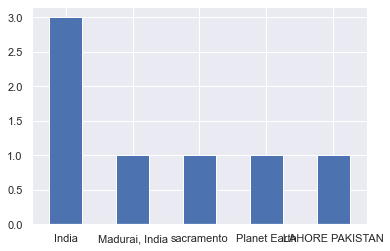

In [7]:
user_count_by_location = df_user['location'].value_counts().head(5)
user_count_by_location.plot.bar(x='location', y='user_count', rot=0)
plt.show()

Plot bar graph for group by statement - by location

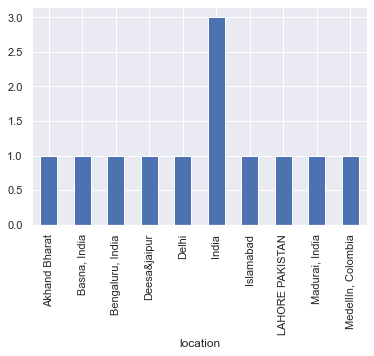

In [8]:

df_user.groupby('location')['name'].nunique().head(10).plot(kind='bar')
plt.show()